In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from scipy.signal import butter, filtfilt, welch
from scipy.stats import kurtosis, skew, entropy
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [43]:
data = pd.read_csv('F:/UNITED TRACTORS/roadConditionDataset.csv')
data.columns = ['timestamp', 'x', 'y', 'z', 'vib']

# data = pd.read_csv('F:/PEMROGRAMAN/Python/transformed_payloats_data.csv')
# data.columns = ['x', 'y', 'z', 'vib']

In [3]:
data.describe()

,x,y,z,vib
count,66082.000000,66082.000000,66082.000000,66082.000000
mean,5.592625,5.434876,4.535672,9.035206
std,0.160735,0.161498,0.523617,0.317540
min,4.110000,3.550000,0.850000,7.830000
25%,5.570000,5.430000,4.370000,8.940000
50%,5.600000,5.440000,4.380000,8.960000
75%,5.600000,5.470000,4.420000,8.990000
max,10.330000,7.090000,7.540000,11.250000


In [27]:
data.describe()

,x,y,z,vib
count,43082.000000,43082.000000,43082.000000,43082.000000
mean,5.593787,5.452754,4.382574,8.958788
std,0.043296,0.053222,0.091440,0.060088
min,4.970000,4.970000,2.510000,8.160000
25%,5.570000,5.430000,4.370000,8.940000
50%,5.600000,5.460000,4.380000,8.960000
75%,5.600000,5.470000,4.400000,8.980000
max,5.960000,6.170000,5.650000,10.060000


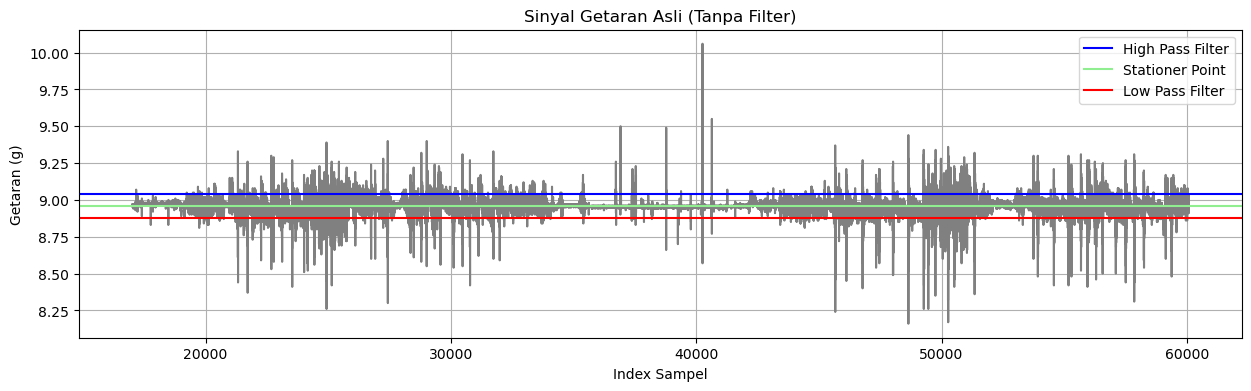

In [52]:
plt.figure(figsize=(15, 4))
plt.plot(data['vib'], color='gray')
plt.title("Sinyal Getaran Asli (Tanpa Filter)")
plt.axhline(y=9.040088, color='blue', linestyle='-', label='High Pass Filter')
plt.axhline(y=8.96, color='lightgreen', linestyle='-', label='Stationer Point')
plt.axhline(y=8.879912, color='red', linestyle='-', label='Low Pass Filter')
plt.xlabel("Index Sampel")
plt.ylabel("Getaran (g)")
plt.grid(True)
plt.legend()
plt.show()

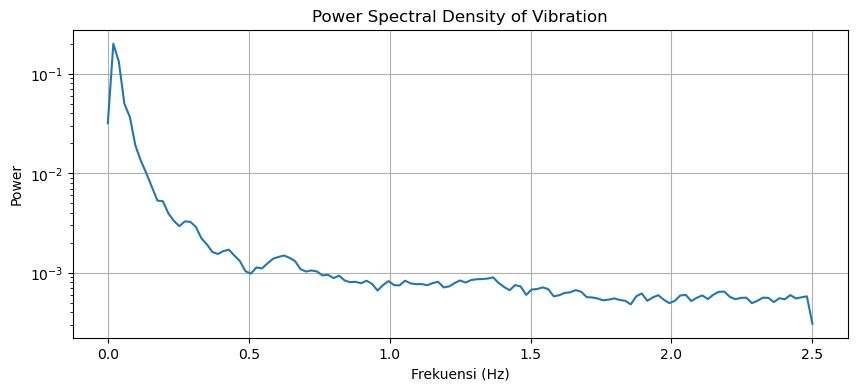

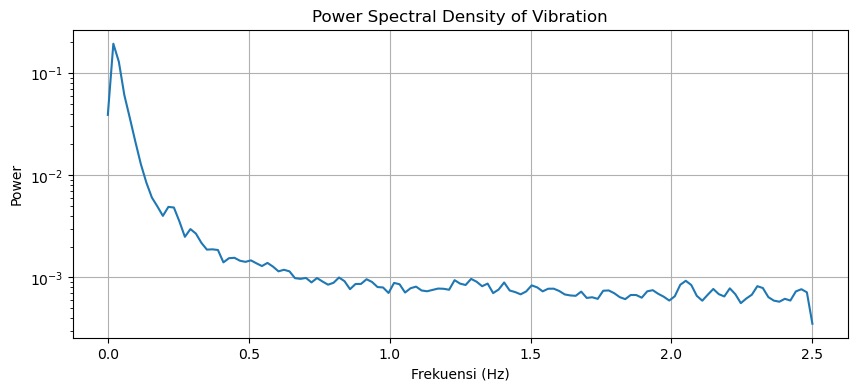

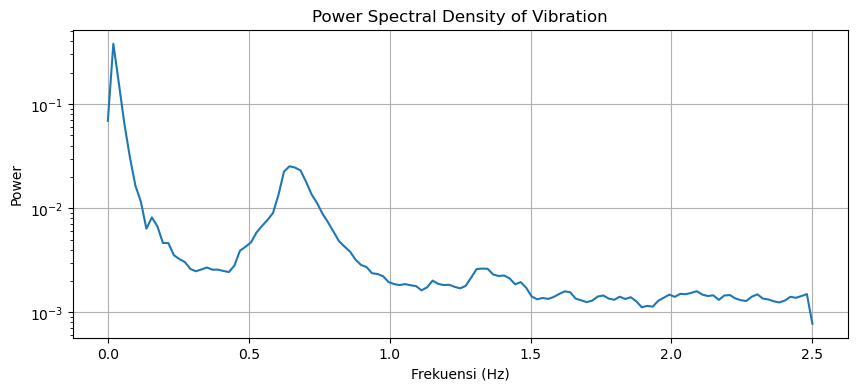

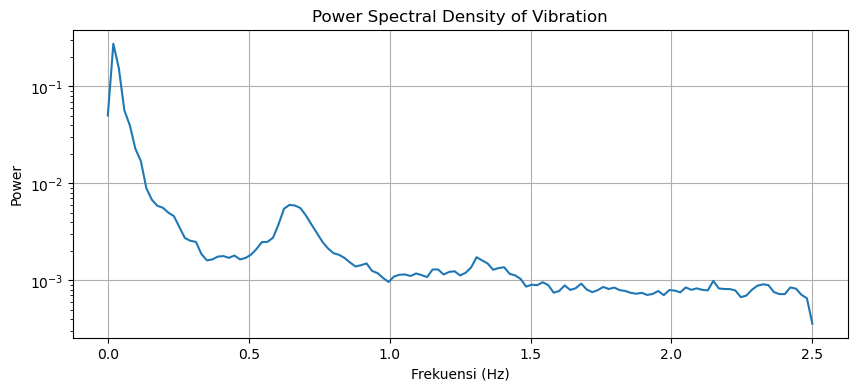

In [38]:
fs = 5.0  # Sampling rate = 5 Hz (data tiap 0.2 detik)
frequencies_x, psd_x = welch(data['x'], fs=fs, nperseg=256)
frequencies_y, psd_y = welch(data['y'], fs=fs, nperseg=256)
frequencies_z, psd_z = welch(data['z'], fs=fs, nperseg=256)
frequencies_vib, psd_vib = welch(data['vib'], fs=fs, nperseg=256)

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies_x, psd_x)
plt.title('Power Spectral Density of Vibration')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies_y, psd_y)
plt.title('Power Spectral Density of Vibration')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies_z, psd_z)
plt.title('Power Spectral Density of Vibration')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies_vib, psd_vib)
plt.title('Power Spectral Density of Vibration')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

In [11]:
data = data.drop('timestamp', axis = 1)

In [6]:
data.describe()

,x,y,z,vib
count,66082.000000,66082.000000,66082.000000,66082.000000
mean,5.592625,5.434876,4.535672,9.035206
std,0.160735,0.161498,0.523617,0.317540
min,4.110000,3.550000,0.850000,7.830000
25%,5.570000,5.430000,4.370000,8.940000
50%,5.600000,5.440000,4.380000,8.960000
75%,5.600000,5.470000,4.420000,8.990000
max,10.330000,7.090000,7.540000,11.250000


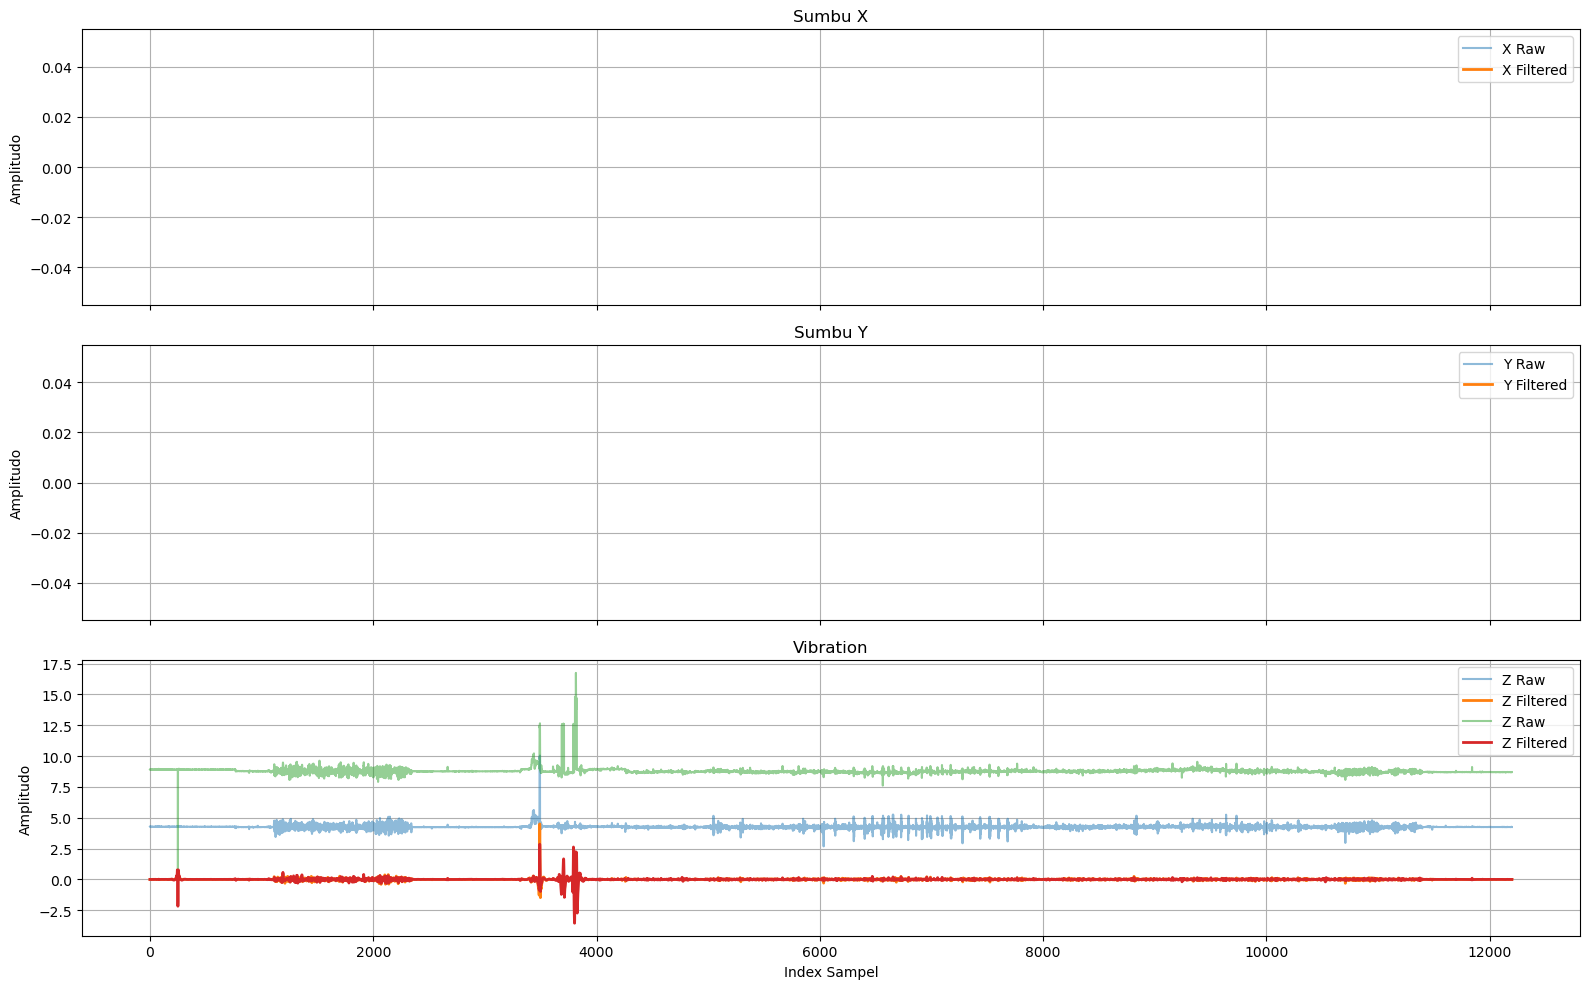

In [44]:
def bandpass_filter(data, lowcut=0.1, highcut=0.7, fs=5.0, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

data['filtered_vibration'] = bandpass_filter(data['vib'])
data['filtered_x'] = bandpass_filter(data['x'])
data['filtered_y'] = bandpass_filter(data['y'])
data['filtered_z'] = bandpass_filter(data['z'])

fig, axs = plt.subplots(3, 1, figsize=(16, 10), sharex=True)

axs[0].plot(data['x'][17000:25000], label='X Raw', alpha=0.5)
axs[0].plot(data['filtered_x'][17000:25000], label='X Filtered', linewidth=2)
axs[0].legend()
axs[0].set_title("Sumbu X")

axs[1].plot(data['y'][17000:25000], label='Y Raw', alpha=0.5)
axs[1].plot(data['filtered_y'][17000:25000], label='Y Filtered', linewidth=2)
axs[1].legend()
axs[1].set_title("Sumbu Y")

axs[2].plot(data['z'][:17000], label='Z Raw', alpha=0.5)
axs[2].plot(data['filtered_z'][:17000], label='Z Filtered', linewidth=2)
axs[2].legend()
axs[2].set_title("Sumbu Z")

axs[2].plot(data['vib'][:17000], label='Z Raw', alpha=0.5)
axs[2].plot(data['filtered_vibration'][:17000], label='Z Filtered', linewidth=2)
axs[2].legend()
axs[2].set_title("Vibration")

for ax in axs:
    ax.grid(True)
    ax.set_ylabel("Amplitudo")
axs[-1].set_xlabel("Index Sampel")

plt.tight_layout()
plt.show()


In [45]:
def ten_point_average(window):
    """
    Calculates the ten-point average roughness (Rz) for a signal window.
    Assumes 5 highest peaks and 5 lowest valleys are used.
    """
    if len(window) < 10: # Need at least 10 points for this calculation
        return 0.0
    
    sorted_window = np.sort(window)
    # Average of the 5 highest peaks
    avg_peaks = np.mean(sorted_window[-5:])
    avg_valleys = np.mean(sorted_window[:5])
    
    return np.abs(avg_peaks - avg_valleys)

In [46]:
def extract_features(signal, fs=5, window_size=50, step=2):
    features = []
    indices = []

    for start in range(0, len(signal) - window_size + 1, step):
        window = signal[start:start+window_size]
        
        # Time Domain Features 
        rms = np.sqrt(np.mean(np.square(window)))
        peak_to_peak = np.max(window) - np.min(window)
        max_val = np.max(window)
        min_val = np.min(window)
        mean_val = np.mean(window)
        ten_pt_avg = ten_point_average(window)
        # Kurtosis (Included as it's a higher-order statistic and not explicitly excluded by paper, although not in final list of 54 features for all axes) 
        kurt_val = kurtosis(window)

        # Frequency Domain Features 
        freqs, psd = welch(window, fs=fs, nperseg=window_size)
        psd_sum = np.sum(psd)
        
        band_edges = np.arange(0, fs/2 + 0.5, 0.5) # Example: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

        band_features = {}
        for k in range(len(band_edges) - 1):
            low_f = band_edges[k]
            high_f = band_edges[k+1]
            band_mask = (freqs >= low_f) & (freqs < high_f)
            
            if np.any(band_mask):
                current_band_psd = psd[band_mask]
                band_power = np.sum(current_band_psd)
                band_rms = np.sqrt(np.mean(np.square(current_band_psd))) if np.any(current_band_psd) else 0.0
                band_max = np.max(current_band_psd)
            else:
                band_power, band_rms, band_max = 0.0, 0.0, 0.0
            
            band_features[f'band_{low_f}_{high_f}_power'] = band_power
            band_features[f'band_{low_f}_{high_f}_rms'] = band_rms
            band_features[f'band_{low_f}_{high_f}_max'] = band_max

        # Wavelet Domain Features 
        wavelet_features = {}
        wavelets = ['morl', 'db6', 'db10'] # Morlet ('morl'), Daubechies 6 ('db6'), Daubechies 10 ('db10')
        scales = [4, 5] 

        for wavelet_name in wavelets:
            try:
                if wavelet_name == 'morl': # Morlet is a Continuous Wavelet, typically used with cwt
                    # For CWT, 'scales' parameter is a list of scales.
                    # As the paper refers to 'scales 4 and 5', we directly use these.
                    coef, freqs_cwt = pywt.cwt(window, scales, wavelet_name)
                    # coef will be an array of coefficient arrays, one for each scale
                    for i, current_scale_coef in enumerate(coef):
                        if len(current_scale_coef) > 0:
                            wavelet_rms = np.sqrt(np.mean(np.square(current_scale_coef)))
                            wavelet_ten_pt_avg = ten_point_average(current_scale_coef)
                        else:
                            wavelet_rms, wavelet_ten_pt_avg = 0.0, 0.0
                        
                        wavelet_features[f'wavelet_{wavelet_name}_s{scales[i]}_rms'] = wavelet_rms
                        wavelet_features[f'wavelet_{wavelet_name}_s{scales[i]}_ten_pt_avg'] = wavelet_ten_pt_avg
                else: # 'db6' and 'db10' are Discrete Wavelets, typically used with DWT levels
                    # For DWT, 'level' is specified. The interpretation of "scales 4 and 5" for DWT
                    # could mean decomposition up to level 5, and then taking coeffs from levels 4 and 5.
                    # pywt.wavedec computes DWT at successive levels.
                    
                    # Determine maximum decomposition level for the window size
                    max_level = pywt.dwt_max_level(data_len=len(window), filter_len=pywt.Wavelet(wavelet_name).dec_len)
                    
                    # Ensure we don't request levels beyond what's possible
                    decomposition_levels = [lvl for lvl in scales if lvl <= max_level] # Use scales 4 and 5 as levels
                    
                    if not decomposition_levels: # If no valid levels, skip this wavelet or fill with zeros
                        for scale_val in scales: # Ensure all expected features are present even if zero
                            wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = 0.0
                            wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = 0.0
                        continue # Skip to next wavelet

                    # Perform DWT decomposition up to the highest requested level
                    coeffs = pywt.wavedec(window, wavelet_name, level=max(decomposition_levels))
                    
                    # coeffs[0] is approximation coefficients at the highest level
                    # coeffs[1], coeffs[2], ... are detail coefficients at levels max_level, max_level-1, ...
                    
                    # We need coefficients for specific levels (scales 4 and 5)
                    # DWT coefficients are typically accessed as coeffs[level_idx] where level_idx=1 is highest freq detail
                    # So, if we want level 4 and 5 detail coeffs, we need to map the 'scale' to the correct index in coeffs.
                    # coeffs = [cA_n, cD_n, cD_n-1, ..., cD_1]
                    # To get cD_4 and cD_5, assuming 'level' 4 and 5 refer to detail coefficients.
                    
                    # For example, if max_level is 5, coeffs would be [cA5, cD5, cD4, cD3, cD2, cD1]
                    # So, cD5 is coeffs[1], cD4 is coeffs[2].
                    # Let's align 'scale' with 'DWT detail level' (cD_level).
                    
                    # Ensure access to valid detail coefficient indices
                    # DWT detail coefficients are usually indexed from 1 (highest frequency) to max_level (lowest frequency detail)
                    # coeffs array: [cA_level, cD_level, ..., cD_1]
                    # So, cD_level corresponds to coeffs[len(coeffs) - level]
                    
                    for scale_val in scales:
                        if scale_val <= max_level:
                            # The index for cD_scale_val in the coeffs array is (max_level - scale_val + 1)
                            # However, pywt.wavedec returns [cA_N, cD_N, cD_N-1, ..., cD_1]
                            # So cD_N is coeffs[1], cD_{N-1} is coeffs[2]... cD_1 is coeffs[N]
                            # The detail coefficient for scale_val (level) is coeffs[max_level - scale_val + 1]
                            detail_coefs = coeffs[max_level - scale_val + 1]

                            if len(detail_coefs) > 0:
                                wavelet_rms = np.sqrt(np.mean(np.square(detail_coefs)))
                                wavelet_ten_pt_avg = ten_point_average(detail_coefs)
                            else:
                                wavelet_rms, wavelet_ten_pt_avg = 0.0, 0.0
                            
                            wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = wavelet_rms
                            wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = wavelet_ten_pt_avg
                        else: # Scale requested is higher than possible decomposition level
                             wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = 0.0
                             wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = 0.0
            except ValueError:
                # Handle cases where wavelet or scale might not be suitable for the window size
                # or if the wavelet name is invalid for DWT.
                for scale_val in scales:
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = 0.0
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = 0.0
            except IndexError: # Handle cases like empty coef_array
                 for scale_val in scales:
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = 0.0
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = 0.0
            except RuntimeError: # Specific error for pywt CWT/DWT if signal is too short or wavelet params are off
                for scale_val in scales:
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_rms'] = 0.0
                    wavelet_features[f'wavelet_{wavelet_name}_s{scale_val}_ten_pt_avg'] = 0.0
                    
        feat = {
            'rms': rms,
            'peak_to_peak': peak_to_peak,
            'max_val': max_val,
            'min_val': min_val,
            'mean_val': mean_val,
            'ten_point_avg': ten_pt_avg,
            'kurtosis': kurt_val, # Keep kurtosis as it's a higher-order statistic
            **band_features,
            **wavelet_features
        }
        
        features.append(feat)
        indices.append(start)

    return pd.DataFrame(features), indices

# --- Re-extract features with updated function ---
features_vib, _ = extract_features(data['filtered_vibration'].values, fs=5)
features_x, _ = extract_features(data['filtered_x'].values, fs=5)
features_y, _ = extract_features(data['filtered_y'].values, fs=5)
features_z, window_indices = extract_features(data['filtered_z'].values, fs=5)

features_df = pd.concat([
    features_vib.add_prefix('vib_'),
    features_x.add_prefix('x_'),
    features_y.add_prefix('y_'),
    features_z.add_prefix('z_')
], axis=1)

features_df['window_start_index'] = window_indices

In [40]:
feature_columns = features_df.drop(columns=['window_start_index'], errors='ignore').columns
X = features_df[feature_columns]

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA(n_components=13) # Mengambil 9 komponen utama
X_pca = pca.fit_transform(X_scaled) # Menerapkan PCA pada data yang sudah di-scaling
print("\nExplained Variance Ratio after PCA (selected components):")
print(pca.explained_variance_ratio_.sum())


Explained Variance Ratio after PCA (selected components):
0.9434439916462631


In [41]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto') # n_init='auto' untuk menghilangkan warning
features_df['cluster_kmeans'] = kmeans.fit_predict(X_pca) # Menggunakan X_pca

ValueError: Length of values (33017) does not match length of index (6076)

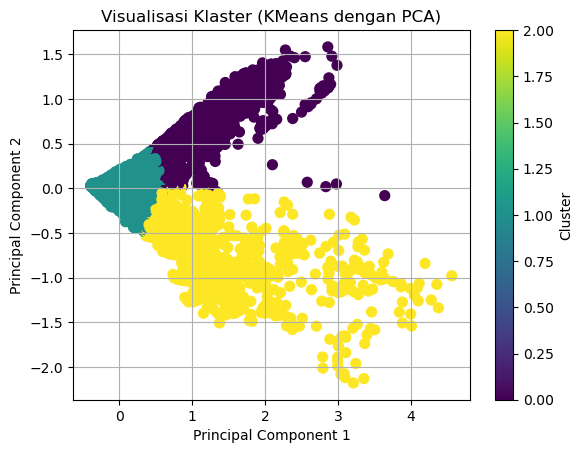

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features_df['cluster_kmeans'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Klaster (KMeans dengan PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

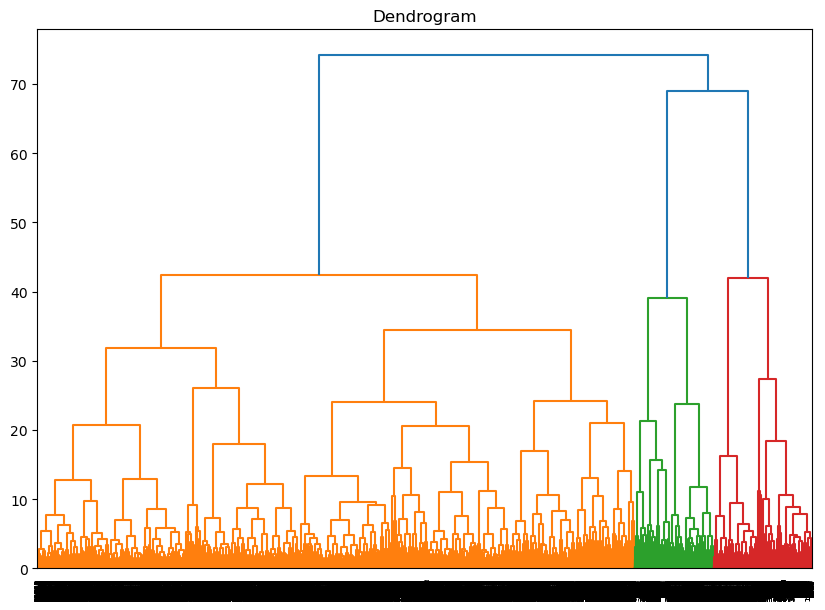

In [30]:
cluster_summary = features_df.groupby('cluster').agg(['mean', 'std'])
print(cluster_summary)

          vib_rms           vib_peak_to_peak             vib_zcr            \
             mean       std             mean       std      mean       std   
cluster                                                                      
0        0.024281  0.021545         0.120042  0.124504  0.290245  0.066807   
1        0.121546  0.058129         0.599576  0.279391  0.217698  0.072795   
2        0.004614  0.011606         0.022366  0.061953  0.206113  0.122515   

        vib_variance             vib_std            ... z_kurtosis            \
                mean       std      mean       std  ...       mean       std   
cluster                                             ...                        
0           0.001048  0.002961  0.024213  0.021489  ...   1.343905  3.458638   
1           0.017982  0.021265  0.120953  0.057908  ...   1.609348  2.365114   
2           0.000147  0.001331  0.004537  0.011257  ...   4.150905  6.988766   

        z_dominant_freq           z_spectral_entro

C:\Users\M. Praja Dewanata\AppData\Local\Temp\ipykernel_4976\208536753.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\M. Praja Dewanata\ANACODA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


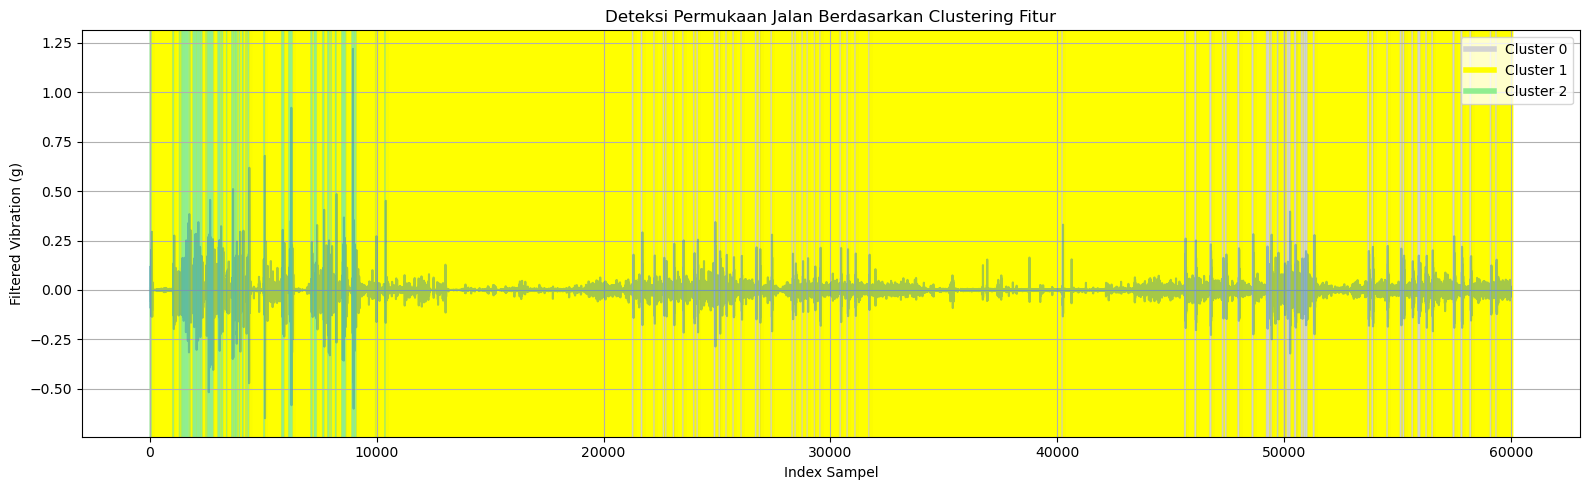

In [21]:
# start_idx = 22000
# end_idx = 26000

start_idx = 0
end_idx = 60000

# start_idx = 0
# end_idx = 60000

colors = {0: 'lightgray', 1: 'yellow', 2: 'lightgreen'}  # Cluster 0 dianggap normal, tidak diberi warna

plt.figure(figsize=(16, 5))
plt.plot(
    range(start_idx, end_idx),
    data['filtered_vibration'].iloc[start_idx:end_idx],
    alpha=0.4,
    label='Filtered Vibration'
)

for i, row in features_df.iterrows():
    idx = window_indices[i]
    cluster = int(row['cluster_kmeans'])
    if start_idx <= idx <= end_idx and cluster in colors:
        plt.axvspan(idx, idx + 50, color=colors[cluster], alpha=0.25)

plt.title("Deteksi Permukaan Jalan Berdasarkan Clustering Fitur")
plt.xlabel("Index Sampel")
plt.ylabel("Filtered Vibration (g)")
plt.legend(handles=[
    plt.Line2D([0], [0], color=color, lw=4, label=f"Cluster {k}")
    for k, color in colors.items()
])
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
#ngga perlu di run
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Standarisasi fitur asli (tanpa kolom tambahan)
feature_columns = features_df.drop(columns=['cluster', 'window_start_index'], errors='ignore').columns
x = features_df[feature_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Simpan hasil PCA ke DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# 4. Variasi yang dijelaskan
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio per PC:")
for i, ratio in enumerate(explained_variance):
    print(f"PC{i+1}: {ratio:.4f}")

# 5. Matriks loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(explained_variance))],
                        index=feature_columns)

print("\nLoadings Matrix (Fitur vs Principal Component):")
print(loadings)


NameError: name 'features_df' is not defined

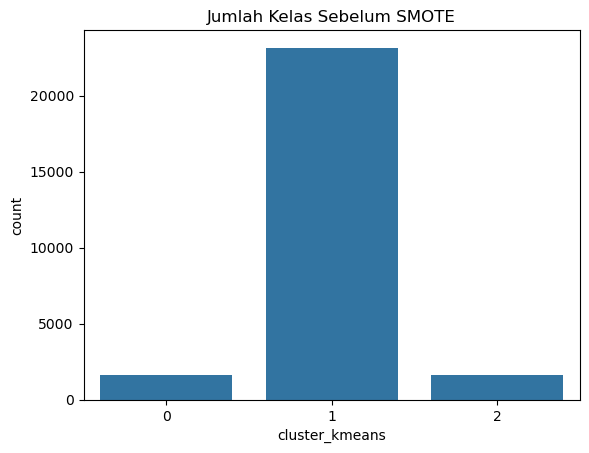

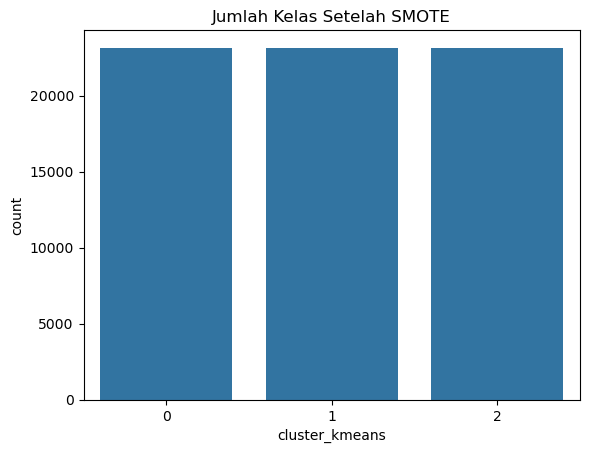

In [22]:
y = features_df['cluster_kmeans']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y) # Menggunakan X_pca

sns.countplot(x=y_train)
plt.title("Jumlah Kelas Sebelum SMOTE")
plt.show()

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_resampled)
plt.title("Jumlah Kelas Setelah SMOTE")
plt.show()

# SUPPORT VECTOR MACHINE (SVM)

In [23]:
parameters_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(estimator=SVC(random_state=0),
                               param_grid=parameters_svm,
                               verbose=1,
                               n_jobs=-1,
                               cv=5,
                               scoring='accuracy')
grid_search_svm.fit(X_resampled, y_resampled)

best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_
print("\nSVM Best Parameters:", best_params_svm)

y_pred_svm = best_model_svm.predict(X_test) 
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 36 candidates, totalling 180 fits

SVM Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      1.00      1.00      5789
           2       0.97      1.00      0.99       404

    accuracy                           1.00      6604
   macro avg       0.99      1.00      0.99      6604
weighted avg       1.00      1.00      1.00      6604

SVM Accuracy Score: 0.9974258025439128


In [34]:
import pickle

with open('svm_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [16]:
print("Training features:", X_train.columns.tolist())
print("Inference features:", X.columns.tolist()) 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# RANDOM FOREST

In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_resampled, y_resampled) 

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print("\nRandom Forest Best Parameters:", best_params_rf)

y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Random Forest Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      1.00      1.00      5789
           2       0.98      1.00      0.99       404

    accuracy                           1.00      6604
   macro avg       0.99      1.00      0.99      6604
weighted avg       1.00      1.00      1.00      6604

Random Forest Accuracy Score: 0.9981829194427619


In [25]:
import joblib
import pickle

joblib.dump(kmeans, 'kmeans_model_updated_waveletss.pkl')
joblib.dump(scaler, 'scaler_updated_waveletss.pkl')
joblib.dump(pca, 'pca_model_updated_waveletss.pkl')
with open('rf_model_updated_waveletss.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
with open('svm_model_updated_waveletss.pkl', 'wb') as file:
    pickle.dump(best_model_svm, file)

print("\nModels and preprocessors saved with '_updated_wavelet.pkl' suffix.")


Models and preprocessors saved with '_updated_wavelet.pkl' suffix.


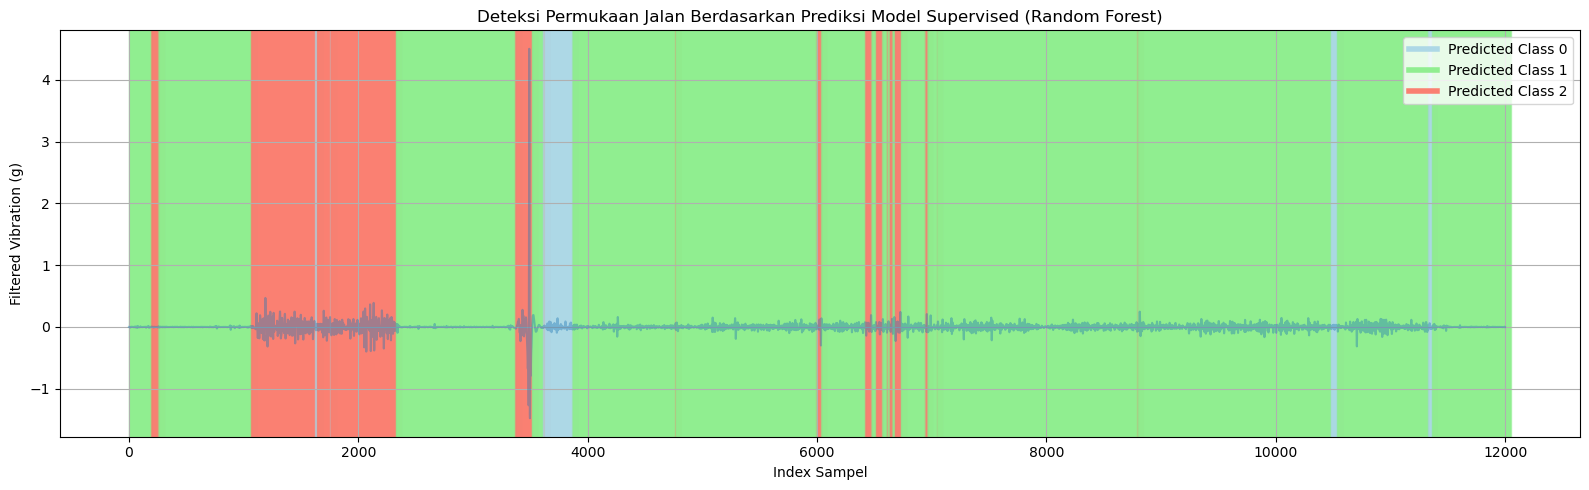

In [52]:
# ini buat uji model pake data baru, ga perlu di run. cuma buat tes aja
scaler_full_data = MinMaxScaler()
X_full_data = features_df.drop(columns=['cluster_kmeans', 'window_start_index'], errors='ignore')
X_scaled_full_data = scaler_full_data.fit_transform(X_full_data)

pca_model_for_demo = PCA(n_components=13)
pca_model_for_demo.fit(X_scaled_full_data)

features_vib_full, _ = extract_features(data['filtered_vibration'].values, fs=5)
features_x_full, _ = extract_features(data['filtered_x'].values, fs=5)
features_y_full, _ = extract_features(data['filtered_y'].values, fs=5)
features_z_full, window_indices_full = extract_features(data['filtered_z'].values, fs=5)

all_features_df = pd.concat([
    features_vib_full.add_prefix('vib_'),
    features_x_full.add_prefix('x_'),
    features_y_full.add_prefix('y_'),
    features_z_full.add_prefix('z_')
], axis=1)

all_features_scaled = scaler.transform(all_features_df)
all_features_pca = pca_model_for_demo.transform(all_features_scaled)
all_predictions = best_rf_model.predict(all_features_pca)

# start_idx_plot = 0
# end_idx_plot = 60000

start_idx_plot = 0
end_idx_plot = 12000

colors_supervised = {0: 'lightblue', 1: 'lightgreen', 2: 'salmon'}

plt.figure(figsize=(16, 5))
plt.plot(
    range(start_idx_plot, end_idx_plot),
    data['filtered_z'].iloc[start_idx_plot:end_idx_plot],
    alpha=0.4,
    label='Filtered z'
)

for i, pred_class in enumerate(all_predictions):
    idx = window_indices_full[i]
    if start_idx_plot <= idx <= end_idx_plot:
        if pred_class in colors_supervised:
            plt.axvspan(idx, idx + 50, color=colors_supervised[pred_class], alpha=0.3)

plt.title("Deteksi Permukaan Jalan Berdasarkan Prediksi Model Supervised (Random Forest)")
plt.xlabel("Index Sampel")
plt.ylabel("Filtered Vibration (g)")
plt.legend(handles=[
    plt.Line2D([0], [0], color=color, lw=4, label=f"Predicted Class {k}")
    for k, color in colors_supervised.items()
])
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
pip install pyWavelets

Note: you may need to restart the kernel to use updated packages.
